# Project: **Predicting Used Car Price**

In this project we will be performing data analysis on a set of data of used cars and will try to predict a price for a new test data. For this purpose we will use the used car data available from https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data. In total there are 26 columns of which 'Price' will be our target column (label) and other columns will be our features (predictor variables).


In [1]:
import pandas as pd
import numpy as np
#get the path from the website
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

#declare a dataframe by reading a csv file
df = pd.read_csv(url, header =None)

#assigning columns since the csv file did not have any columns
df.columns = ["symboling", "normalized-losses","make","fuel-type", "aspiration", "num-of-doors", "body-style","drive-wheels", "engine-location", "wheel-base", "length", "width", "height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

#replace all the "?" values with NaN
df = df.replace("?", np.NaN)
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We can see that values "?" are replaced with NaN which is generalized form for null values. This can also be viewed in form of boolean where True will indicate if value is null and False will indicated a value is not Null. Additionally, total number of missin values for each particular column is also calculated below.

In [2]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
for column in missing_data.columns.values.tolist():
    if (missing_data[column] == True).any():
        print(column )
        print(missing_data[column].value_counts())
        print("----------------------")

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
----------------------
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
----------------------
bore
False    201
True       4
Name: bore, dtype: int64
----------------------
stroke
False    201
True       4
Name: stroke, dtype: int64
----------------------
horsepower
False    203
True       2
Name: horsepower, dtype: int64
----------------------
peak-rpm
False    203
True       2
Name: peak-rpm, dtype: int64
----------------------
price
False    201
True       4
Name: price, dtype: int64
----------------------


Specifically looking at data for num-of-doors, four door cars are more than two door cars.

In [4]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

## Dealing with Missing Values

There are two ways to apporach solving missing values in our dataset.
1. Drop the missing values:<br>
    1. Drop the whole row <br>
    2. Drop the whole column<br>
    
2. Replace the missing value: <br>
    1. Replacing by an average
    2. Replacing by frequency
    3. Replacing by other functions
    
In this problem, dropping a whole column is not a viable option and neither is dropping a whole row. In this dataset, none of the column is completely empty to be able to dropped. Hence, dropping rows or columns is not a good idea.

However, we can use a mixture of replacing option to achieve a clean dataset. <br>
For **normalized-losses, bore, stroke, horsepower, peak-rpm** we will replace missin values with avergae value of that column. <br>
For **num-of-doors**, based on the fact that 84 % of sedans are having 4 doors, we replace these values with 4.<br>
Finally, **price** row can be dropped since this is our target label and there are only four rows with missing values.



In [5]:
norm_loss_mean = df['normalized-losses'].astype("float").mean(axis = 0)
print("Average normalized-loss:", norm_loss_mean)
df['normalized-losses'].replace(np.NaN,norm_loss_mean, inplace = True)

bore_mean = df['bore'].astype("float").mean(axis=0)
print("Average bore:", bore_mean)
df['bore'].replace(np.NaN,bore_mean, inplace = True)

stroke_mean = df['stroke'].astype("float").mean(axis = 0)
print("Average stroke:", stroke_mean)
df['stroke'].replace(np.NaN,stroke_mean, inplace = True)

horsepower_mean = df['horsepower'].astype("float").mean(axis = 0)
print("Average horsepower:", horsepower_mean)
df['horsepower'].replace(np.NaN,horsepower_mean, inplace = True)

peak_rpm_mean = df['peak-rpm'].astype("float").mean(axis = 0)
print("Average peak-rpm:", peak_rpm_mean)
df['peak-rpm'].replace(np.NaN,peak_rpm_mean, inplace = True)

df['num-of-doors'].replace(np.NaN, 4, inplace = True)

df.dropna(subset = ['price'], axis=0, inplace = True)

df.head()


Average normalized-loss: 122.0
Average bore: 3.3297512437810957
Average stroke: 3.2554228855721337
Average horsepower: 104.25615763546799
Average peak-rpm: 5125.369458128079


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


One last step here is to check the data types of all columns.


In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

There are few features that seem to have incorrect datatype, like num-of-doors, num-of-cylinders, bore, stroke, horsepower, peak-rpm and price. Let's change these datatypes:

In [7]:

df[['bore','stroke']] = df[['bore','stroke']].astype("float")
df['horsepower'] = df['horsepower'].astype("int")
df['peak-rpm'] = df['peak-rpm'].astype("int")
df['normalized-losses'] = df['normalized-losses'].astype("float")
df['price'] = df['price'].astype("float")

df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Here we have cleaned our data and it is now ready for further pre processing. In this next task, data is standardized for some of the columns. The column of city-mpg and highway-mgp have values in mpg but in order for the data to be more relevant other countries as well, we will add a new column of L/100km. 

In [8]:
df['city-L/100km'] = 235 /df['city-mpg']
df['highwat-L/100km'] = 235 / df['highway-mpg']

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highwat-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556,10.681818


In [9]:
df[['length', 'width', 'height']]

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3
...,...,...,...
200,188.8,68.9,55.5
201,188.8,68.8,55.5
202,188.8,68.9,55.5
203,188.8,68.9,55.5


### Normalization

Feature scaling is a process of transforming values in to a common range. In this case, length, height and width can be normalized since the range of length is quite high than width and height. We will use min-max scaling for that. 


In [10]:
df['height'] = (df['height'] - df['height'].min()) / (df['height'].max() -df['height'].min())
df['width'] = (df['width'] - df['width'].min()) / (df['width'].max() -df['width'].min())
df['length'] = (df['length'] - df['length'].min()) / (df['length'].max() -df['length'].min())
df[['length', 'width', 'height']].head()

,length,width,height
0,0.413433,0.324786,0.083333
1,0.413433,0.324786,0.083333
2,0.449254,0.444444,0.383333
3,0.529851,0.504274,0.541667
4,0.529851,0.521368,0.541667


Lastly, for the columns that will be predictor variable for our training set and having string values must be converted to categorical data. Fuel-type is divided into two values, namely **gas** and **diesel**. Similarly, Aspirations can be also be converted into categorical data.

In [11]:
df_fuel = pd.get_dummies(df['fuel-type'])

df_fuel = df_fuel.rename(columns = {'diesel':'fuel-diesel', 'gas':'fuel-gas'})
df = pd.concat([df,df_fuel], axis=1 )
df.drop('fuel-type', axis=1, inplace=True)




In [12]:
#One-hot encoding Aspiration column

df_asp = pd.get_dummies(df['aspiration'])
df_asp
df_asp = df_asp.rename(columns = {'std':'std_asp', 'turbo':'turbo_asp' })

df = pd.concat([df,df_asp], axis=1)
df.drop('aspiration', axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highwat-L/100km,fuel-diesel,fuel-gas,std_asp,turbo_asp
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,...,5000,21,27,13495.0,11.190476,8.703704,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,...,5000,21,27,16500.0,11.190476,8.703704,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.449254,0.444444,...,5000,19,26,16500.0,12.368421,9.038462,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.529851,0.504274,...,5500,24,30,13950.0,9.791667,7.833333,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.529851,0.521368,...,5500,18,22,17450.0,13.055556,10.681818,0,1,1,0


Here we have the data that is ready for analysis. We will be performing exploratory data analysis on this to determine which features are effective to determine the outcome of price of a used car. 

# Exploratory Data Analysis

Exploratory data analysis or EDA is a process of determining set of variables or features on which the outcome or predictor variable is dependent. There are handful of tools and methods that are used to carry out this analysis. 

1. Grouping
2. Continuous numeric variables
3. Descriptive Statistics
4. Categorical Analysis
5. Co-relation Statistics

### Co-relation of Variables

Let's try to comapre and co-relate two variables and plot them to see if they display linear relationship. corr() method is used to display corelation of all the variables as shown below. Value of 1 indicates strongest corelation and this will be accurate as 1 occurs at corelation between two same variables. 


In [13]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highwat-L/100km,fuel-diesel,fuel-gas,std_asp,turbo_asp
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279739,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239544,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360301,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285973,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245803,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309971,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279360,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256734,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267395,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063577,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


Pearson corelation is a metric used to determine the corelation strength and it gives two values. Pearson Coefficient and P value, 

if Coefficient = 1 suggest positive linear relationship <br>
   coefficient = -1 suggest negative linear relationship <br>
   coefficeint = 0 suggest no linear relationship<br>

whereas p-value provides an indication of how strong the corelation is <br>

for, p < 0.001, strong corelation<br>
     p < 0.05, moderate corelation<br>
     p < 0.1, weak corelation<br>
     p > 0.1, no corelation<br>
     
We can also find corelation between two variables as:

#### Price -  Engine Size

In [14]:
df[['price','engine-size']].corr()

,price,engine-size
price,1.000000,0.872335
engine-size,0.872335,1.000000


Determining pearson coefficient and p value, we need to import __stats__ function from _scipy_ library.

In [15]:
from scipy import stats

p_coeff, p_value = stats.pearsonr(df['price'], df['engine-size'])

print("Pearson Coefficient for relation between price and engine size is {} and p_value is {}.". format(p_coeff,p_value) )

Pearson Coefficient for relation between price and engine size is 0.8723351674455186 and p_value is 9.265491622197335e-64.


Coefficient value of 0.87 suggests a strong linear relationship and p_value being etremely less than 0.001 suggest a very strong corelation between engine-size and price of the car. Let's visualize this relationship by plotting it using __regplot__ fucntion from __seaborn__ package which generates a linear line in scatter plot.

<AxesSubplot:xlabel='engine-size', ylabel='price'>

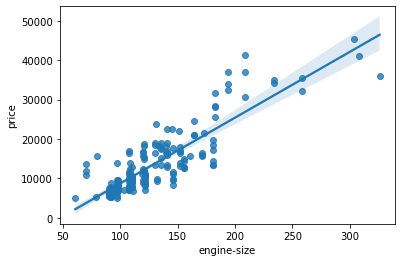

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.regplot(x='engine-size', y='price', data = df)

Similarly, let's try to corelate other numeric variables to find other variables. 

#### Price - Highway MPG

In [17]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


It seems the coefficient value is negative suggesting negative linear relationship. 

In [18]:
p_ceoff_mpg, p_value_mpg = stats.pearsonr(df['highway-mpg'],df['price'])
print("Pearson Coefficient for relation between price and highway-mpg is {} and p_value is {}.". format(p_ceoff_mpg,p_value_mpg) )

Pearson Coefficient for relation between price and highway-mpg is -0.704692265058953 and p_value is 1.7495471144476358e-31.


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

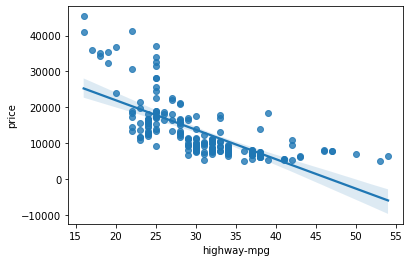

In [19]:
sns.regplot(x='highway-mpg', y='price', data =df)

#### Price - Peak RPM

In [20]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101612
price,-0.101612,1.000000


In [21]:
p_ceoff_rpm, p_value_rpm = stats.pearsonr(df['peak-rpm'],df['price'])
print("Pearson Coefficient for relation between price and peak-rpm is {} and p_value is {}.". format(p_ceoff_rpm,p_value_rpm) )

Pearson Coefficient for relation between price and peak-rpm is -0.10161237413760969 and p_value is 0.1511910706670076.


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

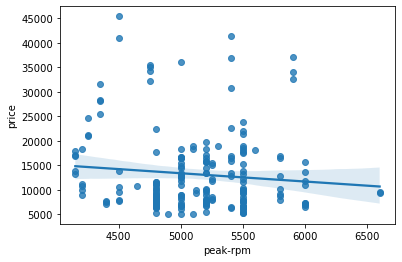

In [22]:
sns.regplot(x='peak-rpm', y='price', data =df)

Linear relation between price and peak-rpm appears to be very poor and also conclusively from the plot above it is visible that the line is nearly horizontal. Hence, peak-rpm is not a good predictor variable for the prediction of price.

## Categorical Data Analysis

In our dataset there are few variables which are non-numeric and can have impact on the price of the vehicle. To determine this corelation we will use groupby method and plot box bars to visualize its effect on price. 

In [23]:
#grouping by enginer location
df_grouped = df[['engine-location', 'body-style','num-of-doors','price']]
df_grouped_el = df_grouped.groupby(['engine-location'], as_index=False).mean()
df_grouped_el


,engine-location,price
0,front,12884.085859
1,rear,34528.000000


<AxesSubplot:xlabel='engine-location', ylabel='price'>

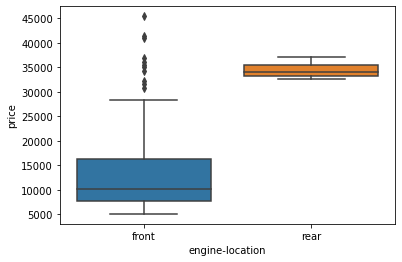

In [24]:
#plot a boxplot to visualize the price dependency on egine location

sns.boxplot(x='engine-location', y='price', data=df)

This high difference in the price range of two engine location makes it a potential feature variable for our analysis. Similarly, let's try to corelate body style and price.


In [25]:
df_grouped_bs = df_grouped.groupby(['body-style', 'engine-location'], as_index=False).mean()
df_grouped_bs

,body-style,engine-location,price
0,convertible,front,18863.000000
1,convertible,rear,37028.000000
2,hardtop,front,18518.666667
3,hardtop,rear,33278.000000
4,hatchback,front,9957.441176
5,sedan,front,14459.755319
6,wagon,front,12371.960000


Above dataframe can be better described in form of a pivot table.

In [26]:
grouped_pivot = df_grouped_bs.pivot(index='engine-location', columns='body-style')
grouped_pivot.fillna(0.0)

price                                                   
body-style      convertible       hardtop    hatchback         sedan     wagon
engine-location                                                               
front               18863.0  18518.666667  9957.441176  14459.755319  12371.96
rear                37028.0  33278.000000     0.000000      0.000000      0.00

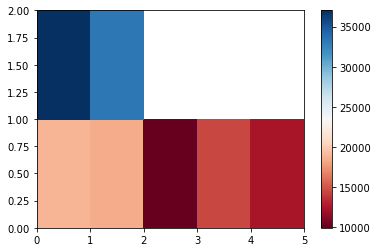

In [27]:
plt.pcolor(grouped_pivot,cmap = 'RdBu')
plt.colorbar()
plt.show()

##plot lavbels and noations will be carried out later

From the above plot it is visible that the data is highly skewed for the engine-location relation with price.This can also be determined from the number of values of front and rear engine location numbers.

In [28]:
df['engine-location'].value_counts().to_frame()

,engine-location
front,198
rear,3


In conclusion, following features variables are selected:
1. Length
2. Width
3. Curb-weight
4. Engine-size
5. Horsepower
6. City-mpg
7. Highway-mpg
8. Wheel-base
9. Bore
10. Drive-wheels

### Linear Regression model 

Initially we will use Multivariate Linear Regression model to predict the car prices and evaluate the results.

In [29]:
#import
from sklearn.linear_model import LinearRegression

#assiging predictor features
X = df[['length','width','curb-weight','engine-size','horsepower', 'city-mpg','highway-mpg', 'wheel-base','bore']]
y = df[['price']]

#model constructor
model = LinearRegression()
#fitting model
model.fit(X, y)

y_pred = model.predict(X)

#calculating r2 (R squared) score
model.score(X, y)

0.8190670251946173

R2 score of training data seems to be 81.90% from above results. However, we should never use testing data for training and hence we will use train_test_split function of sklearn to divide the data into training set and testing set.

Before that, let's splot a distribution curve to visualize the actual and predicted price from the above linear regression modeling.

C:\Users\hardi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hardi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

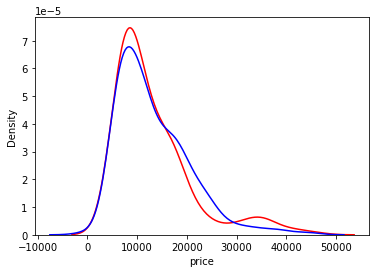

In [30]:
ax = sns.distplot(df['price'], hist=False, color='r')

sns.distplot(y_pred, hist=False,color ='b', ax=ax)


The red curve is the actual car price whereas blue curve is predicted car price and from the plot it is quite matching the actual price. Though the predictions are not very accurate for higher prices. 

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=30)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

model_1.score(X_test, y_test)

0.6269668862514672

Above model gives a r2 score of 62.69% for the testing data. Let's try to use polynomial features to see if we can further improve the r2 score alond with ridge regression (L2 regularization).



In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

poly_model = PolynomialFeatures(degree=2)

#fit and transform the data
X_train_pr = poly_model.fit_transform(X_train)
X_test_pr = poly_model.fit_transform(X_test)

#contruct a ridge model
ridge_model = Ridge(alpha =0.1)

#fit the model
ridge_model.fit(X_train_pr, y_train)

#get the R2 score
ridge_model.score(X_test_pr, y_test)

C:\Users\hardi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.62041e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.7268615629729643

## Conclusion

By using a polynomial features function in a ridge regression model we were able to increase the predictions accuracy of the prices. A higher R2 score suggets a good model with average fit of the data points and hence the predictions are more reliable. 